In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, roc_curve, auc

from sklearn.decomposition import PCA

%matplotlib inline

In [4]:
data = pd.read_csv('data_st.csv')

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,326,327,328,329,330,331,332,333,334,target
0,0.897499,0.934905,2.000000,1.000000,4.728260e+09,1.736898e+09,803.0,14484.71,199400.00,132.50,...,9.804536e+06,3.351771e+07,1.078795e+06,8.273531e+06,4.365961e+06,1.990720e+06,4.605525e+07,8.492736e+06,6.101825e+07,0
1,0.897499,0.934905,41.000000,15.000000,4.728260e+09,1.736898e+09,819.0,93331.24,45354984.33,5538.83,...,9.804536e+06,3.351771e+07,1.078795e+06,8.273531e+06,4.365961e+06,1.990720e+06,2.350000e+04,8.492736e+06,7.250000e+04,0
2,0.897499,0.934905,16.519811,5.492198,4.728260e+09,1.736898e+09,829.0,43003.92,4056920.00,2.21,...,9.804536e+06,3.351771e+07,1.078795e+06,8.273531e+06,4.365961e+06,1.990720e+06,5.665218e+06,8.492736e+06,9.985774e+06,0
3,0.897499,0.934905,4.000000,2.000000,4.728260e+09,1.736898e+09,527.0,8459.08,1435236.45,688.05,...,9.804536e+06,3.351771e+07,1.078795e+06,8.273531e+06,4.365961e+06,1.990720e+06,5.665218e+06,8.492736e+06,9.985774e+06,0
4,0.897499,0.934905,16.519811,5.492198,4.728260e+09,1.736898e+09,522.0,0.00,0.00,0.00,...,9.804536e+06,3.351771e+07,1.078795e+06,8.273531e+06,4.365961e+06,1.990720e+06,1.202500e+05,8.492736e+06,2.522500e+05,0


In [6]:
data_train, data_test = train_test_split(data, stratify = data.target)

In [19]:
train_cols = data_train.columns[:-1]

In [83]:
pca = PCA(n_components=5)

In [84]:
X_train = pca.fit_transform(data_train[train_cols].values)

In [85]:
X_test = pca.transform(data_test[train_cols].values)

In [68]:
#X_train = data_train[train_cols].values
#X_test = data_test[train_cols].values

In [58]:
len(data_train)

15000

In [59]:
len(data_test)

5000

In [60]:
np.mean(data_test.target)

0.0746

In [61]:
np.mean(data_train.target)

0.07466666666666667

In [69]:
model = GradientBoostingClassifier(n_estimators=200, max_depth=3)

In [70]:
model.fit(X_train,data_train.target)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [71]:
pred = model.predict(X_test)

In [72]:
np.mean(pred == data_test.target)

0.926

In [73]:
print(classification_report(data_test.target, pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4627
           1       0.53      0.07      0.13       373

    accuracy                           0.93      5000
   macro avg       0.73      0.53      0.54      5000
weighted avg       0.90      0.93      0.90      5000



0.7723297395923565


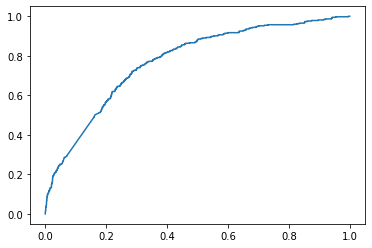

In [74]:
y_score = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(data_test.target, y_score)
roc_auc = auc(fpr,tpr)

plt.plot(fpr,tpr)
print(roc_auc)

In [86]:
X_rrr = pd.DataFrame(X_train)

In [87]:
X_rrr['label'] = data_train['target']

In [88]:
data_0 = X_rrr[X_rrr.label == 0]
data_1 = X_rrr[X_rrr.label == 1]

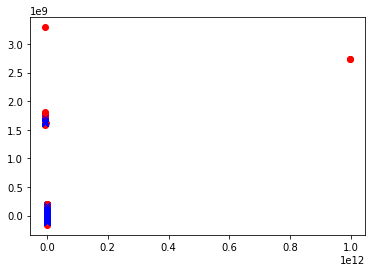

In [92]:
plt.plot(data_0[0],data_0[2],'ro')
plt.plot(data_1[0],data_1[2],'bx')

In [90]:
X_rrr

,0,1,2,3,4,label
0,8.986987e+07,2.620087e+07,-8.165465e+07,1.766053e+06,-2.401322e+06,0.0
1,8.805818e+07,-2.655640e+09,-1.063393e+08,2.154792e+06,-3.439856e+06,0.0
2,8.986952e+07,2.622237e+07,-8.202648e+07,1.833641e+06,-2.393113e+06,0.0
3,8.986987e+07,2.620087e+07,-8.165465e+07,1.766053e+06,-2.401322e+06,0.0
4,8.805942e+07,-2.657524e+09,-1.039226e+08,1.714116e+06,-3.496545e+06,0.0
...,...,...,...,...,...,...
14995,8.805678e+07,-2.657459e+09,-1.064121e+08,2.165144e+06,-3.439398e+06,0.0
14996,8.805028e+07,-2.650677e+09,-1.038419e+08,4.164065e+07,-1.373406e+06,0.0
14997,8.806018e+07,-2.652733e+09,-1.058325e+08,2.067403e+06,-3.450021e+06,NaN
14998,8.986987e+07,2.620087e+07,-8.165465e+07,1.766053e+06,-2.401322e+06,0.0


In [120]:
17+13+4+7+6

47

In [117]:
9+10+11+12+9

51

In [101]:
2.1/28.8

0.07291666666666667

In [102]:
149+85+69

303

In [103]:
894+1445+611+3859+1140

7949

In [108]:
1140/7949

0.14341426594540194